# K-means ++
1. Take one center c1, chosen uniformly at random X
2. Take an new center ci, choosing x e X with probability Dx^2/(summe Dx^2) 
3. Repeat step 2 until we have taken k centers altogether
4. Proceed as with the standard  k-means algorthm


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Allows jupyter to display plots inside notebooks
%matplotlib inline

# This will make Jupyter display the plots as vector graphics
%config InlineBackend.figure_format = 'svg'


In [2]:
#Datensatz mit 2 Spalten und n Zeilen zufällig generieren
n_samples=10
data = np.random.random((n_samples, 2))
print(data)

data.max()

[[0.99037836 0.79327149]
 [0.95360515 0.35594002]
 [0.26518468 0.05861451]
 [0.73843806 0.92615765]
 [0.23800448 0.55611116]
 [0.62063192 0.97539952]
 [0.47104662 0.024057  ]
 [0.43981949 0.68251362]
 [0.90823969 0.80122326]
 [0.04637537 0.28081897]]


0.9903783572978548

In [3]:
f1=data[0:((n_samples)), 0]

In [4]:
f2=data[0:((n_samples)),1]

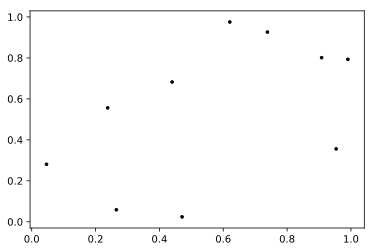

In [5]:
plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

In [6]:
xAchsemax= f1.max()
xAchsemin = f1.min()
yAchsemax = f2.max()
yAchsemin = f2.min()


# Step 1
Take one center c1, chosen uniformly at random from X

In [7]:
C = np.random.random((1,2))


cx1= C[0:((1)),0]
cy1 = C[0:((1)),1]

In [8]:
print (C)

[[0.39705698 0.83544914]]


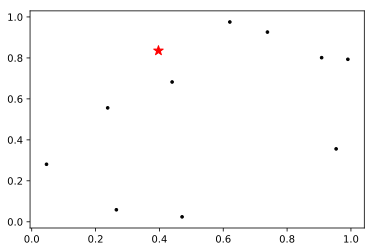

In [9]:
plt.scatter(f1,f2,c='black',s=7)

plt.scatter(cx1,cy1,marker='*',c='red',s=100)

# Step 2: 
Take a new center ci choosing xEX with probability (D(x)^2)/(Summe D(x)^2)

D(x) denote the shortest distance from a data point to the closest center we have already chosen

Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2


https://msdn.microsoft.com/de-de/magazine/mt185575.aspx

https://stackoverflow.com/questions/5466323/how-exactly-does-k-means-work

In [10]:
#Distanz von c1 zu jedem Datenpunkt --> D(x) --> distances
for i in range(len(X)):
     distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
     print(distances)

[0.59481863]
[0.73462566]
[0.78794819]
[0.35322666]
[0.3214458]
[0.26376479]
[0.81475867]
[0.15880147]
[0.51232721]
[0.65619526]


*Wichtig* Bei Schleife nur Distanz zum nächst liegenden Cluster wichtig

--> siehe k-means

In [33]:
#quadrierter Abstand berechnen --> D(x)^2 --> dist_2
for i in range(len(X)):
    dist_2 = ((((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2))**2
    print (dist_2)

[0.35380921]
[0.53967486]
[0.62086236]
[0.12476907]
[0.1033274]
[0.06957186]
[0.66383168]
[0.02521791]
[0.26247917]
[0.43059222]


In [34]:
dist_2.shape

(1,)

In [42]:
 a = np.array([dist_2])
a.tolist()

[[0.4305922189885508]]

In [14]:
#Wahrscheinlichkeiten berechnen --> (D(x)^2)/Summe(D(x)^2) --> prob
#Distanzen quadriert und Vektor durch seine eigene Summe teilen
for i in range(len(X)):
    prob = (((((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2))**2)/(sum(dist_2))
    print (prob)

[0.82168045]
[1.25333166]
[1.44188011]
[0.28976156]
[0.2399658]
[0.1615725]
[1.54167134]
[0.05856564]
[0.60957714]
[1.]


In [15]:
#Funktion mit der wahrscheinlichkeit von prob den zugehörigen Wert aus X als neues Center zunehmen
# -> weighted Probability distribution

In [16]:
from random import choice

https://www.python-kurs.eu/python_numpy_wahrscheinlichkeit.php

https://eli.thegreenplace.net/2010/01/22/weighted-random-generation-in-python

im Internet dazu gefunden --> muss noch angepasst werden

from numpy.random import choice

draw = choice(list_of_candidates, number_of_items_to_pick, 

                        p=probability_distribution)

In [17]:
#Funktion gibt kein Datenpunkt, sondern ein Index mit dem man dann ein Datenpunkt aus X auswählen kann
from numpy.random import choice
draw = choice(data, 1,
              p=prob)

ValueError: 'a' must be 1-dimensional

In [ ]:
#aus Index neuen Datenpunkt auswählen
#Also in etwa so random_x = X[np.random.choice(X)]